# Notebook for plotting the results obtained by running run_experiments.py

In [1]:
import seaborn as sns
import numpy as np
import pickle
import pandas as pd 
from functools import reduce
import matplotlib.pyplot as plt


To plot the results, you need to update the results_path_main to the path where the experimental results were locally saved on your machine. 

In [2]:
results_path_main = 'results/'

In [3]:
seeds_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
methods_list = ['target', 'shared_source_target', 'radial_gan', 'htce']
learners_list = ['SLearner', 'TLearner', 'DRLearner', 'TARNet']

colors_list = ['#EE854A', '#C44E52', '#4878D0', '#869495', '#8B50A3', '#55A868']

In [4]:
def plot_results(x_axis, y_axis, x_label_name, x_values_to_plot, experiment_name, experiment_id, dataset, learners_list, methods_list, seeds_list):
    results_path = results_path_main + str(experiment_name) + '/experiment_id_' + str(experiment_id) 
    results_df_list = []
    for seed in seeds_list:
        results_filename = f"dataset_{dataset}_linear_binary_False-seed{seed}.csv"
        results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
    results_df = pd.concat(results_df_list)
    
    colors_list = ['#EE854A', '#4878D0',  '#8B50A3', '#55A868']
    linestyle_list = ['-', '--', ':', '-.']
    marker_list = ['d', 'o', '^', '*']

    fig, axs = plt.subplots(1, 4, figsize=(16,4))
    plt.gcf().subplots_adjust(bottom=0.15)
    
    for learner_id, learner in enumerate(learners_list):
        results_df_learner = results_df.loc[(results_df["Learner"] == learner)]

        for method_id, method in enumerate(methods_list):
            sub_df = results_df_learner.loc[(results_df_learner["Method"] == method)][[x_axis, y_axis]]

            sub_df = sub_df[sub_df[x_axis].isin(x_values_to_plot)]
            
            sub_df_mean = sub_df.groupby(x_axis).agg('mean').reset_index()
            sub_df_std = sub_df.groupby(x_axis).agg('std').reset_index()
            
            x_values = sub_df_mean.loc[:, x_axis].values
            y_values = sub_df_mean.loc[:, y_axis].values
            y_err = sub_df_std.loc[:, y_axis].values / np.sqrt(10)
            
            axs[learner_id].plot(x_values, y_values, label=method, 
                                                      color=colors_list[method_id], linestyle=linestyle_list[method_id], marker=marker_list[method_id])
            axs[learner_id].fill_between(x_values, y_values-y_err, y_values+y_err, alpha=0.1, color=colors_list[method_id])
        axs[learner_id].set_title(learner, fontsize=18)
        plt.rcParams['text.usetex'] = True
        axs[learner_id].set_xlabel(x_label_name, fontsize=18)
        plt.rcParams['text.usetex'] = False
    
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    labels_map = {'target': 'Target', 'shared_source_target': 'Shared features', 'radial_gan': 'RadialGAN', 'htce': 'HTCE (ours)'}

    new_labels = []
    for label in labels:
        new_labels.append(labels_map[label])
    
    axs[0].set_ylabel("PEHE", fontsize=18)

    fig.legend(lines[:4], new_labels[:4], bbox_to_anchor=(1.15, 0.75), ncol=1, prop={'size': 14})
    fig.tight_layout()
    plt.show()
    
    fig.savefig(experiment_name + "_" + dataset + ".pdf", bbox_inches="tight")

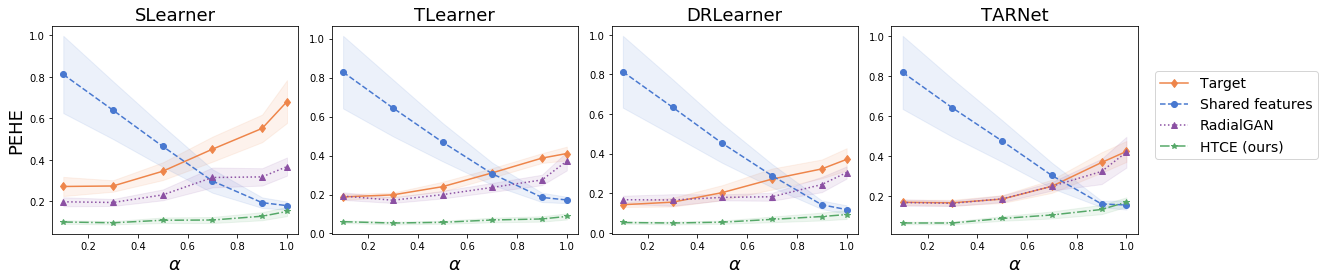

In [5]:
plot_results(x_axis='PO Sharing Scale', y_axis='PEHE', x_label_name=r'$\alpha$', x_values_to_plot=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
             experiment_name='po_sharing_across_domains', experiment_id=0,  dataset='twins',
             methods_list=methods_list, learners_list=learners_list, seeds_list=seeds_list)

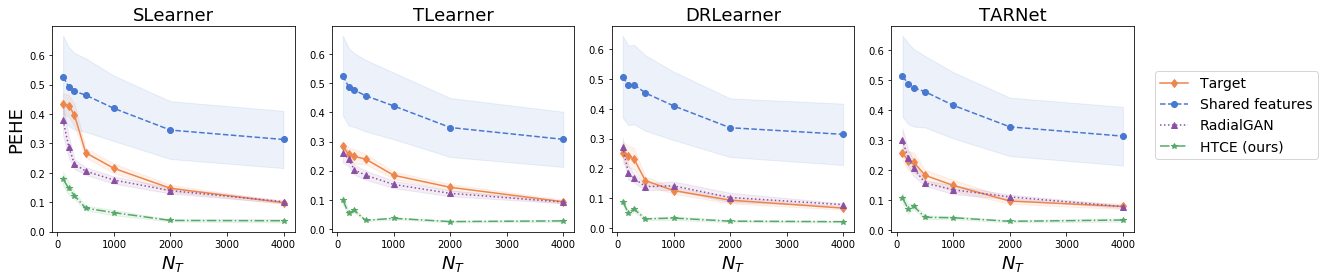

In [6]:
plot_results(x_axis='Target dataset size', y_axis='PEHE', x_label_name=r'$N_T$', x_values_to_plot=[100, 200, 300, 500, 1000, 2000, 4000],
             experiment_name='target_dataset_size', experiment_id=0,  dataset='twins',
             methods_list=methods_list, learners_list=learners_list, seeds_list=seeds_list)

In [7]:
def compute_results(y_axis, experiment_name, experiment_id, dataset, learners_list, methods_list, seeds_list):

    results_path = results_path_main + str(experiment_name) + '/experiment_id_' + str(experiment_id) 
    results_df_list = []
    for seed in seeds_list:
        results_filename = f"dataset_{dataset}_linear_binary_False-seed{seed}.csv"
        results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
    results_df = pd.concat(results_df_list)
    for method_id, method in enumerate(methods_list):
        print (method)
         
        results_df_method = results_df.loc[(results_df["Method"] == method)]
        results_string = ""
        
        for learner_id, learner in enumerate(learners_list):
            results_df_learner = results_df_method.loc[(results_df_method["Learner"] == learner)]
            
            results_mean = np.mean(results_df_learner[y_axis])
            results_ste = np.std(results_df_learner[y_axis]) / np.sqrt(len(seeds_list))

            results_string = results_string + f" ${round(results_mean, 2)} \pm {round(results_ste, 2)}$ & "
        print (results_string)
        print ()

    plt.show()

In [8]:
methods_list = ['target', 'shared_source_target', 'radial_gan', 'htce']
learners_list = ['SLearner', 'TLearner', 'DRLearner', 'TARNet']
seeds_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

compute_results(y_axis='PEHE', experiment_name='baseline_experiment', experiment_id=0,  dataset='twins',
                methods_list=methods_list, learners_list=learners_list,  seeds_list=seeds_list)

target
 $0.34 \pm 0.04$ &  $0.24 \pm 0.02$ &  $0.2 \pm 0.04$ &  $0.19 \pm 0.02$ & 

shared_source_target
 $0.45 \pm 0.09$ &  $0.47 \pm 0.09$ &  $0.45 \pm 0.09$ &  $0.46 \pm 0.09$ & 

radial_gan
 $0.23 \pm 0.03$ &  $0.22 \pm 0.03$ &  $0.18 \pm 0.02$ &  $0.21 \pm 0.04$ & 

htce
 $0.11 \pm 0.01$ &  $0.06 \pm 0.01$ &  $0.05 \pm 0.01$ &  $0.09 \pm 0.01$ & 



In [9]:
def plot_results_selection_bias(x_axis, y_axis, x_label_name, x_values_to_plot, learner, experiment_name, experiment_id, dataset, learners_list, methods_list, seeds_list):
    results_path = results_path_main + str(experiment_name) + '/experiment_id_' + str(experiment_id) 
    results_df_list = []
    for seed in seeds_list:
        results_filename = f"dataset_{dataset}_linear_binary_False-seed{seed}.csv"
        results_df_list.append(pd.read_csv(results_path + '/' + results_filename, index_col=None))
    results_df = pd.concat(results_df_list)

    results_df = results_df[results_df['Learner'] == learner]

    colors_list = ['#EE854A', '#4878D0',  '#8B50A3', '#55A868']
    linestyle_list = ['-', '--', ':', '-.']
    marker_list = ['d', 'o', '^', '*']

    fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
    plt.gcf().subplots_adjust(bottom=0.15)

    for learner_id, selection_bias_source in enumerate([0, 2, 10]):
        results_df_learner = results_df.loc[(results_df["Selection bias source"] == selection_bias_source)]

        for method_id, method in enumerate(methods_list):
            sub_df = results_df_learner.loc[(results_df_learner["Method"] == method)][[x_axis, y_axis]]

            sub_df_mean = sub_df.groupby(x_axis).agg('mean').reset_index()
            sub_df_std = sub_df.groupby(x_axis).agg('std').reset_index()

            x_values = sub_df_mean.loc[:, x_axis].values
            y_values = sub_df_mean.loc[:, y_axis].values
            y_err = sub_df_std.loc[:, y_axis].values / (np.sqrt(len(seeds_list) * 2))

            axs[learner_id].plot(x_values, y_values, label=method, 
                                                      color=colors_list[method_id], linestyle=linestyle_list[method_id], marker=marker_list[method_id])
            axs[learner_id].fill_between(x_values, y_values-y_err, y_values+y_err, alpha=0.1, color=colors_list[method_id])
        plt.rcParams['text.usetex'] = True
        axs[learner_id].set_title(r'$\kappa_R = $' + str(float(selection_bias_source)), fontsize=24)
        axs[learner_id].set_xlabel(x_label_name, fontsize=24)
        plt.rcParams['text.usetex'] = False
        
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    labels_map = {'target': 'Target', 'shared_source_target': 'Shared features', 'radial_gan': 'RadialGAN', 'htce': 'HTCE (ours)'}

    new_labels = []
    for label in labels:
        new_labels.append(labels_map[label])

    axs[0].set_ylabel("PEHE", fontsize=24)

    fig.legend(lines[:4], new_labels[:4], bbox_to_anchor=(0.98, 0.11), ncol=4, prop={'size': 24})
    fig.tight_layout()
    plt.show()
    fig.savefig(experiment_name + "_" + dataset + "_" + learner + ".pdf", bbox_inches="tight")


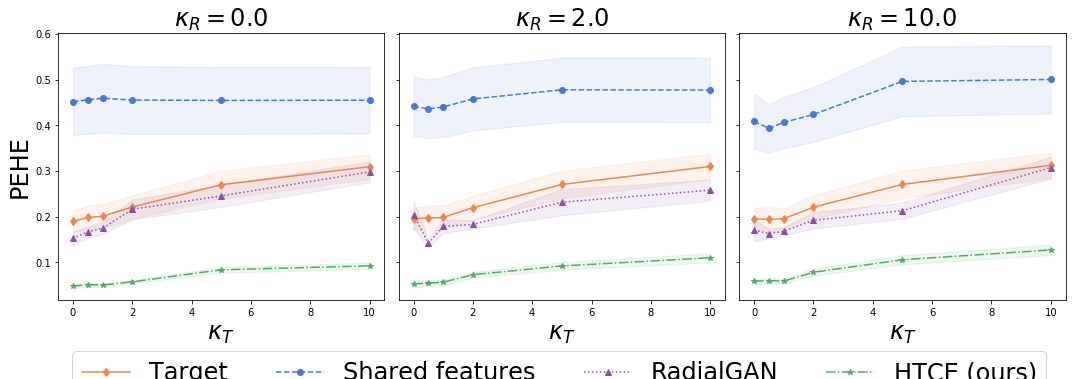

In [10]:
methods_list = ['target', 'shared_source_target', 'radial_gan', 'htce']

plot_results_selection_bias(x_axis='Selection bias target', y_axis='PEHE', x_label_name=r'$\kappa_T$', x_values_to_plot=[0, 0.5, 1, 2, 5, 10], 
                            learner='DRLearner', experiment_name='selection_bias', experiment_id=0,  dataset='twins',
                            methods_list=methods_list, learners_list=learners_list, seeds_list=seeds_list)    